In [1]:
# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
#from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input

# other imports
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import time

Using TensorFlow backend.


In [2]:
import pandas as pd

In [11]:
with open('conf/conf_vgg16.json') as f:
    config = json.load(f)

In [12]:
config

{'classifier_path': 'output/flower_17/vgg16/classifier.pickle',
 'features_path': 'output/flower_17/vgg16/features.h5',
 'include_top': False,
 'labels_path': 'output/flower_17/vgg16/labels.h5',
 'model': 'vgg16',
 'model_path': 'output/flower_17/vgg16/model',
 'num_classes': 17,
 'results': 'output/flower_17/vgg16/results.txt',
 'seed': 9,
 'test_path': 'dataset/test',
 'test_size': 0.1,
 'train_path': 'dataset/train',
 'weights': 'imagenet'}

In [13]:
model_name = config["model"]
weights = config['weights']
include_top = config["include_top"]
train_path    = config["train_path"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
test_size     = config["test_size"]
results     = config["results"]
model_path    = config["model_path"]

In [14]:
# create the pretrained models
# check for pretrained weight usage or not
# check for top layers to be included or not
if model_name == "vgg16":
    base_model = VGG16(weights=weights, include_top=False)
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (224, 224)
elif model_name == "vgg19":
    base_model = VGG19(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)
elif model_name == "resnet50":
    base_model = ResNet50(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('flatten').output)
    image_size = (224, 224)
elif model_name == "inceptionv3":
    base_model = InceptionV3(include_top=include_top, weights=weights, input_tensor=Input(shape=(299,299,3)))
    model = Model(input=base_model.input, output = base_model.output )
    image_size = (299, 299)
elif model_name == "inceptionresnetv2":
    base_model = InceptionResNetV2(include_top=include_top, weights=weights, input_tensor=Input(shape=(299,299,3)))
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (299, 299)
elif model_name == "mobilenet":
    base_model = MobileNet(include_top=include_top, weights=weights, input_tensor=Input(shape=(224,224,3)), input_shape=(224,224,3))
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (224, 224)
elif model_name == "xception":
    base_model = Xception(weights=weights)
    model = Model(input=base_model.input, output=base_model.output)
    image_size = (299, 299)
else:
    base_model = None

print ("[INFO] successfully loaded base model and model...")

[INFO] successfully loaded base model and model...


C:\Users\Architect_shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


In [15]:
# path to training dataset
train_labels = os.listdir(train_path)

In [16]:
# encode the labels
print ("[INFO] encoding labels...")
le = LabelEncoder()
le.fit([tl for tl in train_labels])

[INFO] encoding labels...


LabelEncoder()

In [17]:
# variables to hold features and labels
features = []
labels   = []

# loop over all the labels in the folder
count = 1
for i, label in enumerate(train_labels):
    cur_path = train_path + "/" + label
    count = 1
    for image_path in glob.glob(cur_path + "/*.jpg"):
        img = image.load_img(image_path, target_size=image_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = model.predict(x)
        flat = feature.flatten()
        print (flat)
        features.append(flat)
        labels.append(label)
        print ("[INFO] processed - " + str(count))
        count += 1
        print ("[INFO] completed label - " + label)

[ 0.          0.          0.43751353 ...,  0.          0.59349841  0.        ]
[INFO] processed - 1
[INFO] completed label - bluebell
[ 0.          0.          0.         ...,  0.          0.66513216  0.        ]
[INFO] processed - 2
[INFO] completed label - bluebell
[ 0.          0.          0.         ...,  0.07283448  1.13790894  0.        ]
[INFO] processed - 3
[INFO] completed label - bluebell
[ 0.          0.          0.23083067 ...,  0.          1.30018091  0.        ]
[INFO] processed - 4
[INFO] completed label - bluebell
[ 0.          0.          1.37857914 ...,  0.          0.84354109  0.        ]
[INFO] processed - 5
[INFO] completed label - bluebell
[ 0.          0.          0.         ...,  0.          0.96866232  0.        ]
[INFO] processed - 6
[INFO] completed label - bluebell
[ 0.23209336  0.          0.         ...,  0.          0.75758862  0.        ]
[INFO] processed - 7
[INFO] completed label - bluebell
[ 0.          0.          0.71942204 ...,  0.          0.35927

[ 0.00927642  0.          1.44752908 ...,  0.35570183  0.58337861  0.        ]
[INFO] processed - 62
[INFO] completed label - bluebell
[ 0.          0.          0.         ...,  0.          0.50779599  0.        ]
[INFO] processed - 63
[INFO] completed label - bluebell
[ 0.          0.          0.17658532 ...,  0.          0.73397481  0.        ]
[INFO] processed - 64
[INFO] completed label - bluebell
[ 0.          0.          0.         ...,  0.          1.22159719  0.        ]
[INFO] processed - 65
[INFO] completed label - bluebell
[ 0.          0.          0.         ...,  0.          0.27839383  0.        ]
[INFO] processed - 66
[INFO] completed label - bluebell
[ 0.20059294  0.          0.16275814 ...,  0.          0.68487793  0.        ]
[INFO] processed - 67
[INFO] completed label - bluebell
[ 1.49936068  0.          1.70713663 ...,  0.          0.61222792  0.        ]
[INFO] processed - 68
[INFO] completed label - bluebell
[ 0.          0.          0.         ...,  0.          

[ 0.10655132  0.          0.         ...,  0.          0.63685429  0.        ]
[INFO] processed - 43
[INFO] completed label - buttercup
[ 0.          0.          0.         ...,  0.10255214  0.5687533   0.        ]
[INFO] processed - 44
[INFO] completed label - buttercup
[ 0.07760391  0.          0.05723187 ...,  0.06571756  0.          0.50630701]
[INFO] processed - 45
[INFO] completed label - buttercup
[ 0.          0.          0.         ...,  0.          0.26759094  0.        ]
[INFO] processed - 46
[INFO] completed label - buttercup
[ 0.1148987   0.          0.         ...,  0.          0.64321631  0.        ]
[INFO] processed - 47
[INFO] completed label - buttercup
[ 0.          0.          0.         ...,  0.          0.93546063  0.        ]
[INFO] processed - 48
[INFO] completed label - buttercup
[ 0.          0.          2.07832098 ...,  0.0725301   0.50511128  0.        ]
[INFO] processed - 49
[INFO] completed label - buttercup
[ 0.21866727  0.          0.         ...,  0.   

[ 0.24226817  0.          0.15326858 ...,  0.52217042  0.62924081  0.        ]
[INFO] processed - 24
[INFO] completed label - coltsfoot
[ 0.0639139   0.          0.61076933 ...,  0.29916167  1.02949309  0.        ]
[INFO] processed - 25
[INFO] completed label - coltsfoot
[ 0.66520494  0.          0.         ...,  0.          0.75917971  0.        ]
[INFO] processed - 26
[INFO] completed label - coltsfoot
[ 1.38616776  0.          1.34812546 ...,  0.          0.60825646  0.        ]
[INFO] processed - 27
[INFO] completed label - coltsfoot
[ 0.          0.          0.         ...,  0.          0.51555228  0.        ]
[INFO] processed - 28
[INFO] completed label - coltsfoot
[ 0.          0.          1.33113778 ...,  0.          0.92264098  0.        ]
[INFO] processed - 29
[INFO] completed label - coltsfoot
[ 0.          0.          1.54260731 ...,  0.          1.39694285  0.        ]
[INFO] processed - 30
[INFO] completed label - coltsfoot
[ 0.          0.          0.         ...,  0.   

[ 0.          0.          0.03742063 ...,  0.          0.95660925  0.        ]
[INFO] processed - 5
[INFO] completed label - cowslip
[ 1.60458755  0.          0.49690941 ...,  0.          1.19508612  0.        ]
[INFO] processed - 6
[INFO] completed label - cowslip
[ 0.          0.          0.         ...,  0.          0.87151849  0.        ]
[INFO] processed - 7
[INFO] completed label - cowslip
[ 0.06034753  0.          0.         ...,  0.15784842  0.96057868  0.        ]
[INFO] processed - 8
[INFO] completed label - cowslip
[ 0.18918192  0.          2.13379288 ...,  0.3628453   1.46012855  0.        ]
[INFO] processed - 9
[INFO] completed label - cowslip
[ 0.48449928  0.          1.66744804 ...,  0.          0.70474213  0.        ]
[INFO] processed - 10
[INFO] completed label - cowslip
[ 0.          0.          0.         ...,  0.          0.07634538
  0.4331263 ]
[INFO] processed - 11
[INFO] completed label - cowslip
[ 0.28446481  0.          0.         ...,  0.          1.46337879 

[ 0.37680197  0.          0.         ...,  0.          0.64965403  0.        ]
[INFO] processed - 67
[INFO] completed label - cowslip
[ 0.          0.          0.54472888 ...,  0.          0.65471876  0.        ]
[INFO] processed - 68
[INFO] completed label - cowslip
[ 0.          0.          0.21891636 ...,  0.          0.66304475  0.        ]
[INFO] processed - 69
[INFO] completed label - cowslip
[ 0.50510657  0.          0.         ...,  0.          0.71840715  0.        ]
[INFO] processed - 70
[INFO] completed label - cowslip
[ 0.60858905  0.          1.08093357 ...,  0.26957053  0.47055918  0.        ]
[INFO] processed - 71
[INFO] completed label - cowslip
[ 1.06522751  0.          0.55735481 ...,  0.          0.77716362  0.        ]
[INFO] processed - 72
[INFO] completed label - cowslip
[ 0.          0.          0.09525606 ...,  0.          0.63087183  0.        ]
[INFO] processed - 73
[INFO] completed label - cowslip
[ 0.32673773  0.          0.         ...,  0.08395337  0.55026

[ 0.78364581  0.          0.62485766 ...,  0.          0.78751683  0.        ]
[INFO] processed - 49
[INFO] completed label - crocus
[ 0.          0.          0.46253434 ...,  0.          1.02347624  0.        ]
[INFO] processed - 50
[INFO] completed label - crocus
[ 0.          0.          0.         ...,  0.          0.66258311  0.        ]
[INFO] processed - 51
[INFO] completed label - crocus
[ 0.21053167  0.          0.         ...,  0.          0.50408137  0.        ]
[INFO] processed - 52
[INFO] completed label - crocus
[ 0.          0.          0.25587541 ...,  0.          0.79730117  0.        ]
[INFO] processed - 53
[INFO] completed label - crocus
[ 0.         0.         0.        ...,  0.         0.8022486  0.       ]
[INFO] processed - 54
[INFO] completed label - crocus
[ 0.31597719  0.          0.         ...,  0.27636436  1.26593792  0.        ]
[INFO] processed - 55
[INFO] completed label - crocus
[ 0.53684342  0.          0.         ...,  0.          1.05764437  0.      

[ 0.01154515  0.          0.76060522 ...,  0.          0.77284843  0.        ]
[INFO] processed - 31
[INFO] completed label - daffodil
[ 0.          0.          0.         ...,  0.31845954  0.80230284  0.        ]
[INFO] processed - 32
[INFO] completed label - daffodil
[ 0.          0.          0.         ...,  0.          0.51194715  0.        ]
[INFO] processed - 33
[INFO] completed label - daffodil
[ 0.          0.          0.         ...,  0.          0.42290628  0.        ]
[INFO] processed - 34
[INFO] completed label - daffodil
[ 0.         0.         0.        ...,  0.         0.4110423  0.       ]
[INFO] processed - 35
[INFO] completed label - daffodil
[ 0.          0.          0.89501035 ...,  0.          0.95434546  0.        ]
[INFO] processed - 36
[INFO] completed label - daffodil
[ 0.25733989  0.          0.26363736 ...,  0.          0.46797311  0.        ]
[INFO] processed - 37
[INFO] completed label - daffodil
[ 0.0655458   0.          0.         ...,  0.03100415  0.3945

[ 0.44804829  0.          0.56267619 ...,  0.          0.71289021  0.        ]
[INFO] processed - 13
[INFO] completed label - daisy
[ 0.28869802  0.          0.         ...,  0.          0.45350841  0.        ]
[INFO] processed - 14
[INFO] completed label - daisy
[ 0.          0.          0.         ...,  0.          0.98867828  0.        ]
[INFO] processed - 15
[INFO] completed label - daisy
[ 1.21236992  0.          0.         ...,  0.          1.00573599  0.        ]
[INFO] processed - 16
[INFO] completed label - daisy
[ 0.67867309  0.          0.35098815 ...,  0.24313569  1.32545662  0.        ]
[INFO] processed - 17
[INFO] completed label - daisy
[ 0.          0.          0.65631407 ...,  0.          0.79951727  0.        ]
[INFO] processed - 18
[INFO] completed label - daisy
[ 0.51229191  0.          1.00197148 ...,  0.          0.79628646  0.        ]
[INFO] processed - 19
[INFO] completed label - daisy
[ 0.22651523  0.          0.         ...,  0.          1.0892446   0.       

[ 0.          0.          0.73057914 ...,  0.          0.87977105  0.        ]
[INFO] processed - 76
[INFO] completed label - daisy
[ 0.21070045  0.          0.         ...,  0.22527708  0.39458492
  0.10909769]
[INFO] processed - 77
[INFO] completed label - daisy
[ 0.70261985  0.          0.30285829 ...,  0.          0.54771745  0.        ]
[INFO] processed - 78
[INFO] completed label - daisy
[ 0.          0.          0.         ...,  0.          0.34519461  0.        ]
[INFO] processed - 79
[INFO] completed label - daisy
[ 0.45895365  0.          0.         ...,  0.          0.86520892  0.        ]
[INFO] processed - 80
[INFO] completed label - daisy
[ 0.          0.          0.         ...,  0.          0.78459191  0.        ]
[INFO] processed - 1
[INFO] completed label - dandelion
[ 0.39422649  0.          0.         ...,  0.          0.82662016  0.        ]
[INFO] processed - 2
[INFO] completed label - dandelion
[ 1.34450817  0.          0.         ...,  0.0664993   0.88838732  0.

[ 0.          0.          0.84217775 ...,  0.76450223  0.46181899
  0.07239449]
[INFO] processed - 57
[INFO] completed label - dandelion
[ 1.18104982  0.          0.30261576 ...,  0.          0.59464496  0.        ]
[INFO] processed - 58
[INFO] completed label - dandelion
[ 0.35897756  0.          0.         ...,  0.          0.8498081   0.        ]
[INFO] processed - 59
[INFO] completed label - dandelion
[ 0.01188973  0.          0.         ...,  0.          1.48785067  0.        ]
[INFO] processed - 60
[INFO] completed label - dandelion
[ 0.55435836  0.          0.26004615 ...,  0.          0.96542835  0.        ]
[INFO] processed - 61
[INFO] completed label - dandelion
[ 0.          0.          0.         ...,  0.          0.30621159  0.        ]
[INFO] processed - 62
[INFO] completed label - dandelion
[ 0.85379195  0.          0.32480001 ...,  0.          0.62023371  0.        ]
[INFO] processed - 63
[INFO] completed label - dandelion
[ 0.          0.          0.         ...,  0.  

[ 0.        0.        0.       ...,  0.        0.818968  0.      ]
[INFO] processed - 38
[INFO] completed label - fritillary
[ 0.3549751   0.          0.45458913 ...,  0.          0.38077265  0.        ]
[INFO] processed - 39
[INFO] completed label - fritillary
[ 0.85884959  0.          0.         ...,  0.          0.57932162  0.        ]
[INFO] processed - 40
[INFO] completed label - fritillary
[ 0.52793568  0.          0.         ...,  0.          1.14811707  0.        ]
[INFO] processed - 41
[INFO] completed label - fritillary
[ 0.50473654  0.          0.         ...,  0.          0.70681959  0.        ]
[INFO] processed - 42
[INFO] completed label - fritillary
[ 0.46416792  0.          0.17861819 ...,  0.          0.32987124  0.        ]
[INFO] processed - 43
[INFO] completed label - fritillary
[ 0.          0.          0.         ...,  0.07356787  0.38750809  0.        ]
[INFO] processed - 44
[INFO] completed label - fritillary
[ 0.         0.         0.        ...,  0.0272551  0.

[ 0.28959632  0.          0.09632155 ...,  0.          0.55638158  0.        ]
[INFO] processed - 19
[INFO] completed label - iris
[ 0.25876462  0.          1.55789804 ...,  0.          0.90294373  0.        ]
[INFO] processed - 20
[INFO] completed label - iris
[ 0.21942551  0.          0.         ...,  0.          0.69757468  0.        ]
[INFO] processed - 21
[INFO] completed label - iris
[ 0.01546811  0.          0.         ...,  0.          0.78378552  0.        ]
[INFO] processed - 22
[INFO] completed label - iris
[ 0.          0.          0.         ...,  0.          0.76186538  0.        ]
[INFO] processed - 23
[INFO] completed label - iris
[ 0.          0.          0.         ...,  0.03795851  0.64249605  0.        ]
[INFO] processed - 24
[INFO] completed label - iris
[ 0.03075874  0.          0.         ...,  0.          1.15655613  0.        ]
[INFO] processed - 25
[INFO] completed label - iris
[ 0.          0.          0.         ...,  0.          0.76074088  0.        ]
[INF

[ 0.3486219   0.          0.         ...,  0.          0.87596363  0.        ]
[INFO] processed - 2
[INFO] completed label - lilyvalley
[ 0.          0.          0.68074894 ...,  0.          0.47055915  0.        ]
[INFO] processed - 3
[INFO] completed label - lilyvalley
[ 1.25593233  0.          1.34188759 ...,  0.          0.71177006  0.        ]
[INFO] processed - 4
[INFO] completed label - lilyvalley
[ 2.13988161  0.          1.10179973 ...,  0.          0.17717114  0.        ]
[INFO] processed - 5
[INFO] completed label - lilyvalley
[ 0.18187377  0.          0.         ...,  0.          0.82502127  0.        ]
[INFO] processed - 6
[INFO] completed label - lilyvalley
[ 0.11796281  0.          0.90658104 ...,  0.0237749   0.33810145  0.        ]
[INFO] processed - 7
[INFO] completed label - lilyvalley
[ 0.03209828  0.          0.97230101 ...,  0.          0.62303013  0.        ]
[INFO] processed - 8
[INFO] completed label - lilyvalley
[ 0.55577171  0.          0.         ...,  1.221

[ 0.          0.          0.25504851 ...,  0.          0.57069594  0.        ]
[INFO] processed - 63
[INFO] completed label - lilyvalley
[ 0.58967018  0.          1.56030035 ...,  0.          1.3677001   0.        ]
[INFO] processed - 64
[INFO] completed label - lilyvalley
[ 0.          0.          0.         ...,  0.          0.60260898  0.        ]
[INFO] processed - 65
[INFO] completed label - lilyvalley
[ 0.73211706  0.          0.         ...,  0.01499121  0.5557726   0.        ]
[INFO] processed - 66
[INFO] completed label - lilyvalley
[ 0.          0.          0.         ...,  0.          0.48743615  0.        ]
[INFO] processed - 67
[INFO] completed label - lilyvalley
[ 0.34459311  0.          0.         ...,  0.          0.80151868  0.        ]
[INFO] processed - 68
[INFO] completed label - lilyvalley
[ 0.00298192  0.          0.         ...,  0.8405478   0.22360662
  0.07290398]
[INFO] processed - 69
[INFO] completed label - lilyvalley
[ 0.8563475   0.          0.         ...

[ 0.11132035  0.          0.         ...,  0.          0.58030063
  0.04854308]
[INFO] processed - 45
[INFO] completed label - pansy
[ 0.14584175  0.          0.6956594  ...,  0.          0.66821957  0.        ]
[INFO] processed - 46
[INFO] completed label - pansy
[ 0.26811692  0.          0.         ...,  0.          1.363765    0.        ]
[INFO] processed - 47
[INFO] completed label - pansy
[ 0.          0.          0.55033088 ...,  0.          0.78680551  0.        ]
[INFO] processed - 48
[INFO] completed label - pansy
[ 0.03609848  0.          0.         ...,  0.          0.5807758   0.        ]
[INFO] processed - 49
[INFO] completed label - pansy
[ 0.          0.          0.         ...,  0.19575319  0.75125921  0.        ]
[INFO] processed - 50
[INFO] completed label - pansy
[ 0.          0.          0.         ...,  0.          0.59949583  0.        ]
[INFO] processed - 51
[INFO] completed label - pansy
[ 0.          0.          0.07864514 ...,  0.14040884  0.48321742  0.      

[ 0.          0.          0.         ...,  0.59734136  0.          0.42762795]
[INFO] processed - 27
[INFO] completed label - snowdrop
[ 0.          0.          0.20082587 ...,  0.15813586  0.59230328  0.        ]
[INFO] processed - 28
[INFO] completed label - snowdrop
[ 1.17495966  0.          1.05190706 ...,  0.          0.81252611  0.        ]
[INFO] processed - 29
[INFO] completed label - snowdrop
[ 0.3891789   0.          2.23669267 ...,  0.          1.25178719  0.        ]
[INFO] processed - 30
[INFO] completed label - snowdrop
[ 0.         0.         0.        ...,  0.         0.7650407  0.       ]
[INFO] processed - 31
[INFO] completed label - snowdrop
[ 0.03230211  0.          0.         ...,  0.          0.75956291  0.        ]
[INFO] processed - 32
[INFO] completed label - snowdrop
[ 0.15466663  0.          0.         ...,  0.          1.03001249  0.        ]
[INFO] processed - 33
[INFO] completed label - snowdrop
[ 0.          0.          0.         ...,  0.          0.6171

[ 0.223635    0.          0.7670576  ...,  0.          0.73298717  0.        ]
[INFO] processed - 8
[INFO] completed label - sunflower
[ 0.          0.          0.         ...,  0.          0.47258425  0.        ]
[INFO] processed - 9
[INFO] completed label - sunflower
[ 0.          0.          0.91059583 ...,  0.          0.49809217  0.        ]
[INFO] processed - 10
[INFO] completed label - sunflower
[ 0.          0.          0.40499789 ...,  0.          0.74792778  0.        ]
[INFO] processed - 11
[INFO] completed label - sunflower
[ 0.37585777  0.          0.         ...,  0.          0.48395348  0.        ]
[INFO] processed - 12
[INFO] completed label - sunflower
[ 0.          0.          0.85724795 ...,  0.46841285  1.18966269  0.        ]
[INFO] processed - 13
[INFO] completed label - sunflower
[ 0.11174898  0.          0.         ...,  0.73101717  0.96348006  0.        ]
[INFO] processed - 14
[INFO] completed label - sunflower
[ 0.02829808  0.          1.08539891 ...,  0.     

[ 0.          0.          0.         ...,  0.74180442  1.58474898  0.        ]
[INFO] processed - 69
[INFO] completed label - sunflower
[ 0.0939489   0.          0.         ...,  0.18473959  0.75259531  0.        ]
[INFO] processed - 70
[INFO] completed label - sunflower
[ 0.          0.          0.         ...,  0.          0.66285193  0.        ]
[INFO] processed - 71
[INFO] completed label - sunflower
[ 0.          0.          0.05339798 ...,  0.          0.68825877  0.        ]
[INFO] processed - 72
[INFO] completed label - sunflower
[ 0.          0.          0.         ...,  0.13410024  1.05422211  0.        ]
[INFO] processed - 73
[INFO] completed label - sunflower
[ 0.          0.          0.94161135 ...,  0.          0.56898242  0.        ]
[INFO] processed - 74
[INFO] completed label - sunflower
[ 0.0132494   0.          0.         ...,  0.          1.43275762  0.        ]
[INFO] processed - 75
[INFO] completed label - sunflower
[ 1.87762046  0.          0.         ...,  0.646

[ 0.         0.         0.        ...,  0.         0.3222658  0.       ]
[INFO] processed - 50
[INFO] completed label - tigerlily
[ 0.49190986  0.          0.         ...,  0.          0.89493668  0.        ]
[INFO] processed - 51
[INFO] completed label - tigerlily
[ 0.54926115  0.          0.         ...,  0.          0.61333376  0.        ]
[INFO] processed - 52
[INFO] completed label - tigerlily
[ 0.28605062  0.          0.         ...,  0.          0.80692232  0.        ]
[INFO] processed - 53
[INFO] completed label - tigerlily
[ 0.74191934  0.          0.         ...,  0.          0.8929072   0.        ]
[INFO] processed - 54
[INFO] completed label - tigerlily
[ 0.04852149  0.          0.41895622 ...,  0.          0.7178942   0.        ]
[INFO] processed - 55
[INFO] completed label - tigerlily
[ 1.00259161  0.          0.         ...,  0.          0.70162231  0.        ]
[INFO] processed - 56
[INFO] completed label - tigerlily
[ 0.31790245  0.          0.         ...,  0.         

[ 0.30369967  0.          0.62061942 ...,  0.          0.59704518  0.        ]
[INFO] processed - 32
[INFO] completed label - tulip
[ 0.          0.          0.         ...,  0.          0.57664704  0.        ]
[INFO] processed - 33
[INFO] completed label - tulip
[ 0.          0.          0.         ...,  0.          0.67199963  0.        ]
[INFO] processed - 34
[INFO] completed label - tulip
[ 0.  0.  0. ...,  0.  0.  0.]
[INFO] processed - 35
[INFO] completed label - tulip
[ 0.          0.          0.19586414 ...,  0.          0.86350691  0.        ]
[INFO] processed - 36
[INFO] completed label - tulip
[ 0.82927257  0.          0.04101479 ...,  0.          0.83637333  0.        ]
[INFO] processed - 37
[INFO] completed label - tulip
[ 0.43714207  0.          0.48159984 ...,  0.          1.30959296  0.        ]
[INFO] processed - 38
[INFO] completed label - tulip
[ 0.1857893   0.          0.         ...,  0.          1.11363804  0.        ]
[INFO] processed - 39
[INFO] completed label 

[ 0.39101884  0.          0.59899688 ...,  0.24782565  0.11093646  0.        ]
[INFO] processed - 15
[INFO] completed label - windflower
[ 0.          0.          0.         ...,  0.0747206   0.60149801  0.        ]
[INFO] processed - 16
[INFO] completed label - windflower
[ 0.49890819  0.          0.         ...,  0.          0.96162033  0.        ]
[INFO] processed - 17
[INFO] completed label - windflower
[ 0.12370262  0.          0.19855744 ...,  0.          0.96776336  0.        ]
[INFO] processed - 18
[INFO] completed label - windflower
[ 0.14665414  0.          0.09939578 ...,  0.09786601  0.75380933  0.        ]
[INFO] processed - 19
[INFO] completed label - windflower
[ 0.32560623  0.          1.36547363 ...,  0.          1.26212382  0.        ]
[INFO] processed - 20
[INFO] completed label - windflower
[ 0.16175276  0.          0.         ...,  0.          0.60090125  0.        ]
[INFO] processed - 21
[INFO] completed label - windflower
[ 0.12887233  0.          0.         ...,

[ 0.08451612  0.          0.1723398  ...,  0.          1.0471791   0.        ]
[INFO] processed - 75
[INFO] completed label - windflower
[ 0.          0.          0.13479716 ...,  0.          0.49264383  0.        ]
[INFO] processed - 76
[INFO] completed label - windflower
[ 0.          0.          0.71529585 ...,  0.          0.79607868  0.        ]
[INFO] processed - 77
[INFO] completed label - windflower
[ 0.          0.          0.24165165 ...,  0.          0.61424887  0.        ]
[INFO] processed - 78
[INFO] completed label - windflower
[ 0.          0.          0.36458918 ...,  0.          0.56542999  0.        ]
[INFO] processed - 79
[INFO] completed label - windflower
[ 1.0523628   0.          0.94417882 ...,  0.          0.75409138  0.        ]
[INFO] processed - 80
[INFO] completed label - windflower


In [18]:
# encode the labels using LabelEncoder
le = LabelEncoder()
le_labels = le.fit_transform(labels)

# get the shape of training labels
print ("[STATUS] training labels: {}".format(le_labels))
print ("[STATUS] training labels shape: {}".format(le_labels.shape))

[STATUS] training labels: [ 0  0  0 ..., 16 16 16]
[STATUS] training labels shape: (1360,)


In [19]:
# save features and labels
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

In [20]:
# save model and weights
model_json = model.to_json()
with open(model_path + str(test_size) + ".json", "w") as json_file:
    json_file.write(model_json)

# save weights
model.save_weights(model_path + str(test_size) + ".h5")
print("[STATUS] saved model and weights to disk..")

print ("[STATUS] features and labels saved..")

[STATUS] saved model and weights to disk..
[STATUS] features and labels saved..


In [21]:
# organize imports
from __future__ import print_function

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import pandas as pd

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
# load the user configs
with open('conf/conf_vgg16.json') as f:    
    config = json.load(f)

In [25]:
# config variables
test_size     = config["test_size"]
seed      =     config["seed"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
results     = config["results"]
classifier_path = config["classifier_path"]
train_path    = config["train_path"]
num_classes   = config["num_classes"]
classifier_path = config["classifier_path"]

In [26]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [27]:
h5f_data 

<Closed HDF5 file>

In [28]:
features.shape, labels.shape

((1360, 25088), (1360,))

In [29]:
df_vgg16 = pd.DataFrame(features)

In [30]:
df_vgg16['target'] = labels

In [31]:
df_vgg16.head()

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,target
0,0.0,0.0,0.437514,0.554549,0.000000,0.0,0.0,0.000000,0.0,0.185412,...,0.000000,0.000000,0.0,0.193543,0.000000,0.0,0.000000,0.593498,0.0,0
1,0.0,0.0,0.000000,0.511885,0.535253,0.0,0.0,0.000000,0.0,0.000000,...,0.045396,0.000000,0.0,0.340161,0.000000,0.0,0.000000,0.665132,0.0,0
2,0.0,0.0,0.000000,0.204101,0.000000,0.0,0.0,0.000000,0.0,0.378128,...,0.206585,0.229421,0.0,0.000000,0.000000,0.0,0.072834,1.137909,0.0,0
3,0.0,0.0,0.230831,0.354397,0.000000,0.0,0.0,0.377757,0.0,0.000000,...,0.000000,0.615983,0.0,0.000000,0.000000,0.0,0.000000,1.300181,0.0,0
4,0.0,0.0,1.378579,0.498788,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,1.224765,0.0,0.714447,0.171211,0.0,0.000000,0.843541,0.0,0


In [32]:
# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))


[INFO] features shape: (1360, 25088)
[INFO] labels shape: (1360,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (1224, 25088)
[INFO] test data   : (136, 25088)
[INFO] train labels: (1224,)
[INFO] test labels : (136,)


In [33]:
set(testLabels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [34]:
set(trainLabels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [35]:
# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

# loop over test data
for (label, features) in zip(testLabels, testData):
  # predict the probability of each class label and
  # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(features))[0]
    predictions = np.argsort(predictions)[::-1][:5]

  # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1

  # rank-5 prediction increment
    if label in predictions:
        rank_5 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

# write the accuracies to file
f.write("Rank-1: {:.2f}%\n".format(rank_1))
f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

[INFO] evaluating model...


16

In [37]:
# evaluate the model of test data
preds = model.predict(testData)

# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

In [38]:
accuracy_score(testLabels, preds)

0.875

[INFO] confusion matrix


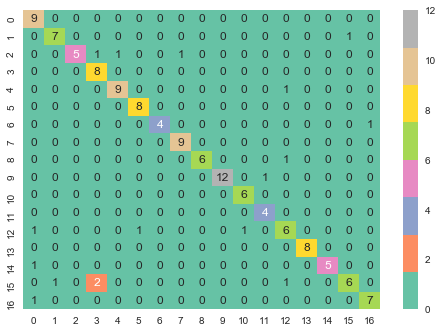

In [39]:
# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
labels = sorted(list(os.listdir(train_path)))

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [40]:
# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

In [41]:
# no.of.trees for Random Forests
num_trees = 100
# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

In [42]:
# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

LR: 0.902759 (0.024448)
LDA: 0.208297 (0.041447)
KNN: 0.536739 (0.046466)
CART: 0.465680 (0.051137)
RF: 0.756531 (0.023918)
NB: 0.455784 (0.045229)
SVM: 0.682967 (0.039153)


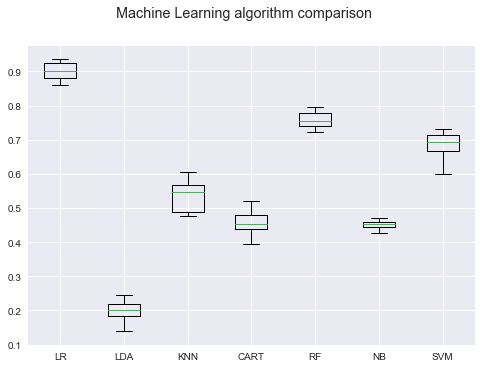

Wall time: 24min 37s


In [43]:
%%time
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')
trainData, trainLabels
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, trainData, trainLabels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [44]:
results

[array([ 0.87804878,  0.93495935,  0.90243902,  0.91869919,  0.92622951,
         0.87704918,  0.90163934,  0.93442623,  0.86065574,  0.89344262]),
 array([ 0.2195122 ,  0.24390244,  0.19512195,  0.2195122 ,  0.18032787,
         0.13934426,  0.20491803,  0.18032787,  0.30327869,  0.19672131]),
 array([ 0.53658537,  0.59349593,  0.4796748 ,  0.56910569,  0.56557377,
         0.47540984,  0.60655738,  0.5       ,  0.55737705,  0.48360656]),
 array([ 0.45528455,  0.4796748 ,  0.41463415,  0.5203252 ,  0.47540984,
         0.39344262,  0.45081967,  0.43442623,  0.58196721,  0.45081967]),
 array([ 0.74796748,  0.76422764,  0.72357724,  0.79674797,  0.73770492,
         0.72131148,  0.77868852,  0.77868852,  0.74590164,  0.7704918 ]),
 array([ 0.44715447,  0.47154472,  0.45528455,  0.56910569,  0.42622951,
         0.44262295,  0.45081967,  0.45901639,  0.45901639,  0.37704918]),
 array([ 0.66666667,  0.73170732,  0.66666667,  0.71544715,  0.70491803,
         0.59836066,  0.68032787,  0.71